In [1]:
import sys
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# os.chdir('/home/yaosy/Document/club/deep-imitation-dev/server-backend/src/mtcnn-pytorch/')

In [15]:
face_dir = '/media/yaosy/办公/bdmeet/yaosy/face/yaosy_face'
pose_dir = '/home/yaosy/Document/pytorch-EverybodyDanceNow/results/target/test_latest/images/'
genFace_dir = pose_dir

save_pose_dir = '/home/yaosy/Document/pytorch-EverybodyDanceNow/data/source/face/train_A'
save_genFace_dir = '/home/yaosy/Document/pytorch-EverybodyDanceNow/data/source/face/train_feat'

facename_list = sorted(os.listdir(face_dir))
if not os.path.exists(save_pose_dir):
    os.mkdir(save_pose_dir)
if not os.path.exists(save_genFace_dir):
    os.mkdir(save_genFace_dir)

In [16]:
with open('/media/yaosy/办公/bdmeet/yaosy/face/face512x512_axis.pkl', 'rb') as f:
    face_coods = pkl.load(f)

In [17]:
crop_w = 128 / 2
crop_h = 128 / 2

In [18]:
for i, facename in enumerate(facename_list):
#     if i > 25:
#         break
    num = facename.split('_')[1][:4]
    poseName = 'img_{}_rendered_input_label.jpg'.format(num)
    genName = 'img_{}_rendered_synthesized_image.jpg'.format(num)
    pose_path = os.path.join(pose_dir, poseName)
    gen_path = os.path.join(genFace_dir, genName)
    
    pose = Image.open(pose_path)
    genFace = Image.open(gen_path)
    # pose = pose.resize((512, 512))
    
    bounding_boxes = face_coods[i]
    mid_w = (bounding_boxes[0, 2] + bounding_boxes[0, 0]) / 2 
    mid_h = (bounding_boxes[0, 3] + bounding_boxes[0, 1]) / 2
    face_pose = pose.crop((mid_w - crop_w, mid_h - crop_h, mid_w + crop_w, mid_h + crop_h))
    genFace_pose = genFace.crop((mid_w - crop_w, mid_h - crop_h, mid_w + crop_w, mid_h + crop_h))
    
#     face_pose = face_pose.resize((128, 160))
#     genFace_pose = genFace_pose.resize((128, 160))
    
    face_pose.save(os.path.join(save_pose_dir, 'label_{}.png'.format(num)))
    genFace_pose.save(os.path.join(save_genFace_dir, 'genFace_{}.png'.format(num)))

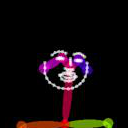

In [19]:
face_pose

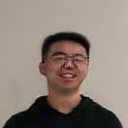

In [20]:
genFace_pose

In [21]:
mov_dir = '/media/yaosy/办公/bdmeet/yaosy/yaosy_squareMov/'
save_dir = '/home/yaosy/Document/pytorch-EverybodyDanceNow/data/target/face/train_B'
bbox_axis = []
noFace_order = []
filename_list = sorted(os.listdir(mov_dir))
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

for i, facename in enumerate(facename_list):
#     if i > 10:
#         break
    num = facename.split('_')[1][:4]
    faceName = 'img_{}.png'.format(num)
    face_path = os.path.join(mov_dir, faceName)
    
    face = Image.open(face_path)
    face = face.resize((512, 512))
    
    bounding_boxes = face_coods[i]
    mid_w = (bounding_boxes[0, 2] + bounding_boxes[0, 0]) / 2 
    mid_h = (bounding_boxes[0, 3] + bounding_boxes[0, 1]) / 2
    face_crop = face.crop((mid_w - crop_w, mid_h - crop_h, mid_w + crop_w, mid_h + crop_h))
    # face_crop = face_crop.resize((128, 160))

    face_crop.save(os.path.join(save_dir, 'face_{}.png'.format(num)))

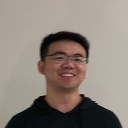

In [22]:
face_crop

In [37]:
50 / 63

0.7936507936507936

In [39]:
128 / 50

2.56

161.28